In [12]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_predict, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

importing dataset

In [13]:
# Load dataset
turnover = pd.read_csv('HR_comma_sep.csv')
turnover.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
unique_departments = turnover['sales'].unique()

print(unique_departments)

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


The column 'sales' refers to the department in which the employee works. For ease of understanding let's rename it to 'Department'

In [4]:
# Replace column name "Sales" to "Department" as it makes more sense
turnover = turnover.rename(columns={'sales': 'Department'})

In [5]:
# Examine basic information about the data
print(turnover.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [6]:
# Check for missing values
missing_values = turnover.isnull().sum()
missing_values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

We see that there is no missing value in any column of the dataset.

In [44]:
# Check the basic statistics of the dataframe
basic_stats = turnover.describe()
basic_stats

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [45]:
# Explore the unique values in each column
unique_counts = turnover.nunique()
print(unique_counts)

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64


## 2. Understand Factors Contributing to Employee Turnover

To explore employee turnover (left column), we will use exploratory data analysis (EDA) techniques.

### 2.1 Heatmap of Correlation Matrix
A heatmap is used to visualize correlations between numerical features. The correlation matrix for numerical features (satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, and promotion_last_5years) reveals:

- Strong negative correlation between satisfaction_level and turnover (left).

- Positive correlation between turnover and time_spend_company.

- Negative correlation between turnover and Work_accident

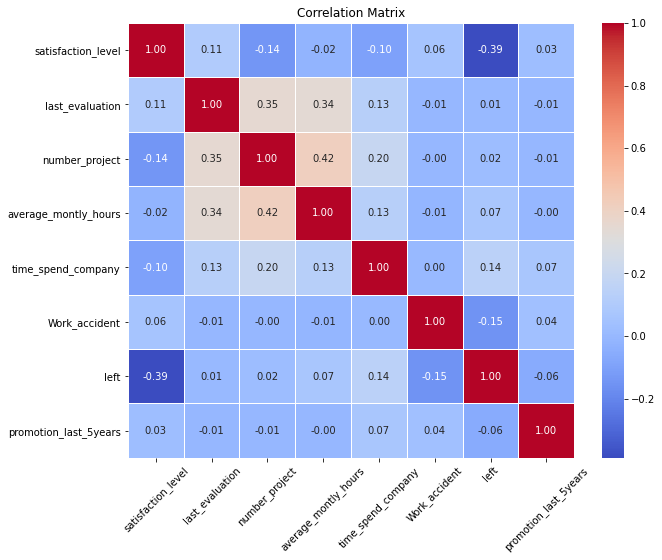

In [46]:
# Compute the correlation matrix
correlation_matrix = turnover.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

## 2.2 Distribution Plots

Employee Satisfaction (satisfaction_level)
The distribution plot shows that employees who left tend to have lower satisfaction levels.

Employee Evaluation (last_evaluation)
Employees with very high or very low evaluations are more likely to leave.

Average Monthly Hours (average_montly_hours)
Turnover is higher among employees with either very low or very high monthly hours.

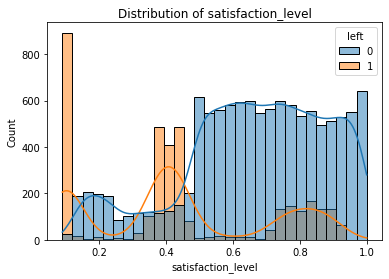

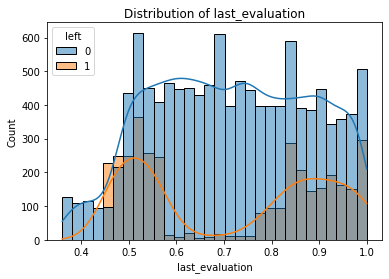

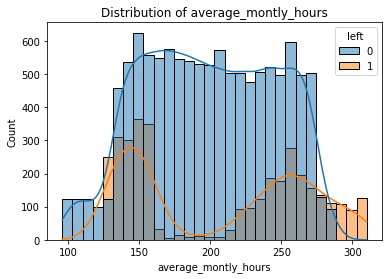

In [47]:
# Distribution plots
for column in ['satisfaction_level', 'last_evaluation', 'average_montly_hours']:
    sns.histplot(data=turnover, x=column, hue='left', kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()


### 2.3 Bar Plot: Employee Project Count vs Turnover
The bar plot shows the distribution of project counts (number_project) for employees who stayed and left:

Employees with very few or too many projects are more likely to leave.

Moderate project counts (e.g., 3–5) are associated with lower turnover.

Low engagement (fewer projects) or burnout (excessive projects) may contribute to higher turnover rates.

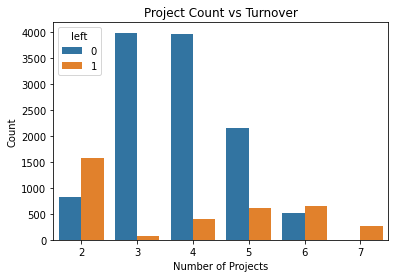

In [48]:
# Bar plot for project count
sns.countplot(data=turnover, x='number_project', hue='left')
plt.title('Project Count vs Turnover')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.show()


## Perform Clustering

### 3.1 Select Relevant Columns
We will use the following columns from the dataset:

- satisfaction_level

- last_evaluation

- left (filtering only employees who left)

In [49]:
# Filter employees who left
left_employees = turnover[turnover['left'] == 1][['satisfaction_level', 'last_evaluation']]

### 3.2 K-Means Clustering
We will cluster the employees who left into 3 clusters using the K-Means algorithm. This requires scaling the features for better performance of the clustering algorithm.

Steps:
- Normalize satisfaction_level and last_evaluation using a scaler.
- Apply K-Means clustering with k = 3
- Visualize the clusters.

In [52]:
#Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(left_employees)

#Apply K-means clustering
kmeans = KMeans(n_clusters = 3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the data
left_employees['Clusters'] = clusters

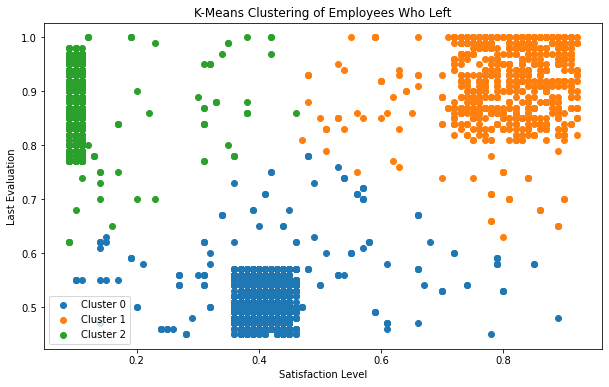

In [54]:
# Visualize clusters
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = left_employees[left_employees['Clusters'] == cluster]
    plt.scatter(cluster_data['satisfaction_level'], cluster_data['last_evaluation'], label=f'Cluster {cluster}')
    
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('K-Means Clustering of Employees Who Left')
plt.legend()
plt.show()

### 3.3 Insights from Clusters
Based on clustering results, we can interpret the employee groups as follows:

Cluster 0: Employees with low satisfaction and moderate evaluations. These employees likely left since they might be dissatisfied with their work, environment, or opportunities.

Cluster 1: Employees with high satisfaction and high evaluations. These employees might have left for better opportunities or career growth despite being satisfied with their current roles.

Cluster 2: Employees with low satisfaction but high evaluations. This group might represent overworked or burned-out employees who performed well but were unhappy with their workload or management.

These insights can help organizations address employee retention by focusing on improving satisfaction and managing workloads effectively.


## 4. Handling Class Imbalance with SMOTE

### 4.1 Pre-process the Data

After visual inspection of the dataframe, we can separate Categorical and Numerical Variables

- Categorical columns: Department, salary

- Numerical columns: satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, promotion_last_5years

**Apply get_dummies() to Categorical Variables**
This will convert the categorical variables into numerical format using one-hot encoding.

**Combine Categorical and Numerical Variables**
Concatenate the one-hot encoded categorical variables with the numerical variables.

In [18]:
turnover.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [57]:
# Separate categorical and numeric variables
categorical_cols = ['Department', 'salary']

numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']

# Convert categorical variables using one-hot encoding
categorical_data = pd.get_dummies(turnover[categorical_cols], drop_first=True)

# Combine categorical and numerical variables
X = pd.concat([turnover[numerical_cols], categorical_data], axis=1)
y = turnover['left']

# Scale the numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

### 4.2 Stratified Train-Test Split

Perform a stratified train-test split to maintain the same class distribution in both sets.

- Split ratio: 80:20

- random_state: 123

In [58]:
# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

### 4.3 Upsample the Training Dataset using SMOTE

Apply the SMOTE technique to oversample the minority class (left = 1) in the training dataset.

In [59]:
# Apply SMOTE to upsample the minority class
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution after SMOTE:
0    9142
1    9142
Name: left, dtype: int64


## 5. Performing 5-Fold Cross-Validation and Evaluation

We will train and evaluate the following models using 5-fold cross-validation:

- Logistic Regression

- Random Forest Classifier

- Gradient Boosting Classifier

We will then generate classification reports for each model.

### 5.1 Logistic Regression

In [62]:
# Logistic Regression
logistic_regression = LogisticRegression(random_state=123)

# 5-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
cv_scores = cross_val_score(logistic_regression, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

print("Logistic Regression Cross-Validation Scores:", cv_scores)
print("Logistic Regression Mean CV Accuracy:", cv_scores.mean())

# Train and Evaluate
logistic_regression.fit(X_train_resampled, y_train_resampled)
y_pred_lr = logistic_regression.predict(X_test)

# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Cross-Validation Scores: [0.77878042 0.76182663 0.77358491 0.77249111 0.76094092]
Logistic Regression Mean CV Accuracy: 0.769524798518952
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      2286
           1       0.50      0.81      0.62       714

    accuracy                           0.76      3000
   macro avg       0.71      0.78      0.72      3000
weighted avg       0.83      0.76      0.78      3000



### 5.2 Random Forest Classifier

In [65]:
# Random Forest Classifier
random_forest = RandomForestClassifier(random_state=123)

# 5-Fold Cross-Validation
cv_scores = cross_val_score(random_forest, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

print("Random Forest Cross-Validation Scores:", cv_scores)
print("Random Forest Mean CV Accuracy:", cv_scores.mean())

# Train and Evaluate
random_forest.fit(X_train_resampled, y_train_resampled)
y_pred_rf = random_forest.predict(X_test)

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Cross-Validation Scores: [0.98687449 0.98824173 0.98796828 0.98714794 0.9868709 ]
Random Forest Mean CV Accuracy: 0.9874206656219391
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



### 5.3 Gradient Boosting Classifier

In [66]:
# Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=123)

# 5-Fold Cross-Validation
cv_scores = cross_val_score(gradient_boosting, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

print("Gradient Boosting Cross-Validation Scores:", cv_scores)
print("Gradient Boosting Mean CV Accuracy:", cv_scores.mean())

# Train and Evaluate
gradient_boosting.fit(X_train_resampled, y_train_resampled)
y_pred_gb = gradient_boosting.predict(X_test)

# Classification Report
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Cross-Validation Scores: [0.96718622 0.9630845  0.96800656 0.96691277 0.96608315]
Gradient Boosting Mean CV Accuracy: 0.9662546394941748
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.92      0.94      0.93       714

    accuracy                           0.97      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.97      0.97      0.97      3000



- Logistic Regression: High precision for employees who stayed, but relatively low precision for those who left. Also the accuracy is moderate and we see imbalanced precision and recall for the two classes.
- Random Forest Classifier: Excellent performance across all metrics and very high precision and recall for both classes
- Gradient Boosting Classifier: High precision and recall for both classes, but slightly lower than Random Forest

**Comparison and Best Model**
- Random Forest outperforms Logistic Regression and Gradient Boosting in terms of accuracy, precision, recall, and F1-score.

- Logistic Regression has the lowest performance, indicating that it's less suitable for this dataset compared to the other two.

- Gradient Boosting provides a good balance between precision and recall, but Random Forest has a slight edge.

Therefore, based on the classification reports, the Random Forest Classifier is the best model.

## 6. Identifying the best model

To identify the best model among the Logistic Regression, Random Forest Classifier, and Gradient Boosting Classifier, we will evaluate their performance using the ROC/AUC score, plot the ROC curve, and analyze the confusion matrix for each model.

### 6.1 ROC/AUC and ROC Curve

The ROC (Receiver Operating Characteristic) curve illustrates the true positive rate (sensitivity) against the false positive rate (1-specificity) at various threshold settings. The AUC (Area Under the Curve) quantifies the overall ability of the model to discriminate between positive and negative classes.

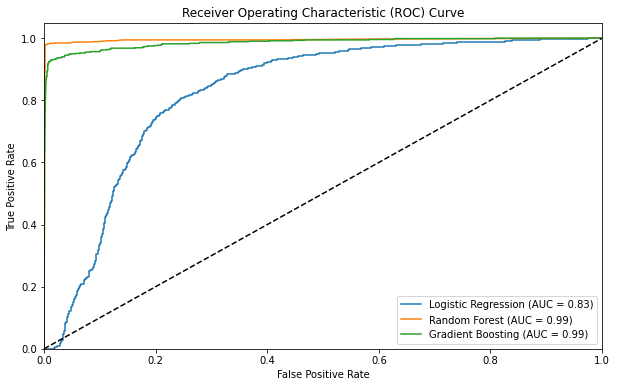

Logistic Regression AUC: 0.83
Random Forest AUC: 0.99
Gradient Boosting AUC: 0.99


In [68]:
# Function to calculate ROC/AUC and plot
def plot_roc_curve(model, X_test, y_test, label):
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    return roc_auc

# Plotting ROC curves for each model
plt.figure(figsize=(10, 6))
roc_auc_lr = plot_roc_curve(logistic_regression, X_test, y_test, 'Logistic Regression')
roc_auc_rf = plot_roc_curve(random_forest, X_test, y_test, 'Random Forest')
roc_auc_gb = plot_roc_curve(gradient_boosting, X_test, y_test, 'Gradient Boosting')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC scores
print(f"Logistic Regression AUC: {roc_auc_lr:.2f}")
print(f"Random Forest AUC: {roc_auc_rf:.2f}")
print(f"Gradient Boosting AUC: {roc_auc_gb:.2f}")

Both Random Forest and Gradient Boosting have an AUC of 0.99, but when deciding on the best model, one would need to consider other factors such as:

**Computational Cost**: Random Forest tends to be faster in training compared to Gradient Boosting.

**Interpretability**: Random Forests are generally easier to interpret compared to Gradient Boosting.

**Overfitting**: Gradient Boosting models can be prone to overfitting if not properly tuned.

In this case, the **Random Forest would be better**. Although Gradient Boosting matches it in performance (AUC = 0.99), the other benefits of the Random Forest model are useful.

### 6.2 Confusion Matrix

The confusion matrix provides insights into the number of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).

In [70]:
# Function to display confusion matrix
def display_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model.__class__.__name__}:")
    print(cm)

# Display confusion matrices for each model
display_confusion_matrix(logistic_regression, X_test, y_test)
display_confusion_matrix(random_forest, X_test, y_test)
display_confusion_matrix(gradient_boosting, X_test, y_test)


Confusion Matrix for LogisticRegression:
[[1711  575]
 [ 136  578]]
Confusion Matrix for RandomForestClassifier:
[[2276   10]
 [  15  699]]
Confusion Matrix for GradientBoostingClassifier:
[[2231   55]
 [  46  668]]


- Random Forest Classifier:

Best performance with the highest true negatives and true positives, and very few false positives and negatives. It effectively identifies both classes with high accuracy.

- Gradient Boosting Classifier:

Strong performance but slightly less effective than Random Forest in terms of misclassifications.

- Logistic Regression:

The least effective model among the three, with a higher number of misclassifications, particularly false positives.

**Final Recommendation**
Based on the confusion matrices and overall performance metrics, the Random Forest Classifier is the best model, providing the most reliable predictions for employee turnover with minimal misclassification.

### 6.3 Choosing Between Recall and Precision

When evaluating models for employee turnover prediction:

**Recall** (True Positive Rate): Measures the ability of a model to find all relevant cases (i.e., employees who left). High recall is crucial in this context because failing to identify employees likely to leave can lead to increased turnover costs.

**Precision**: Measures the accuracy of positive predictions. While important in some contexts (e.g., fraud detection), in this case it is less critical than recall because we want to ensure we capture as many actual leavers as possible.

Given that missing an employee who is likely to leave could have significant implications for retention strategies and workforce stability, **recall should be prioritized** over precision in this scenario.

## 7. Retention Strategies for Targeted Employees

### 7.1. Predict Turnover Probability Using the Best Model

First, use the Random Forest model to predict the probability of employee turnover for the test data:

In [71]:
# Predict probabilities on the test data
y_prob = random_forest.predict_proba(X_test)[:, 1]  # Probability of leaving

# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({'Probability_of_Leaving': y_prob})

# Concatenate predictions with the test data
results_df = pd.concat([X_test.reset_index(drop=True), predictions_df], axis=1)

# Display the first few rows of the results
print(results_df.head())


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0            1.476804         0.314894       -0.651538             -0.201242   
1            0.591928         1.249673       -0.651538              1.400634   
2            0.350598         1.249673       -0.651538             -0.321383   
3           -0.534278        -0.619886       -0.651538              0.439508   
4           -0.172283         1.074402       -0.651538             -1.142345   

   time_spend_company  Work_accident  promotion_last_5years  Department_RandD  \
0           -1.026126      -0.411165              -0.147412                 0   
1            1.028546      -0.411165              -0.147412                 0   
2            0.343655      -0.411165              -0.147412                 0   
3           -0.341235       2.432112              -0.147412                 0   
4           -1.026126      -0.411165              -0.147412                 0   

   Department_accounting  Depart

### 7.2. Categorize Employees into Zones and Suggest Retention Strategies

Now, categorize employees based on the probability scores and suggest retention strategies for each zone:

In [73]:
# Define the zones
def categorize_employee(prob):
    if prob < 0.20:
        return 'Safe Zone (Green)'
    elif 0.20 <= prob < 0.60:
        return 'Low-Risk Zone (Yellow)'
    elif 0.60 <= prob < 0.90:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

# Apply the categorization
results_df['Risk_Zone'] = results_df['Probability_of_Leaving'].apply(categorize_employee)

# Display counts per zone
print(results_df['Risk_Zone'].value_counts())

# Display the first few rows with the Risk Zone
results_df.head()


Safe Zone (Green)            2202
High-Risk Zone (Red)          651
Low-Risk Zone (Yellow)         94
Medium-Risk Zone (Orange)      53
Name: Risk_Zone, dtype: int64


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,Probability_of_Leaving,Risk_Zone
0,1.476804,0.314894,-0.651538,-0.201242,-1.026126,-0.411165,-0.147412,0,0,0,0,0,0,1,0,0,0,1,0.00,Safe Zone (Green)
1,0.591928,1.249673,-0.651538,1.400634,1.028546,-0.411165,-0.147412,0,0,1,0,0,0,0,0,0,1,0,0.38,Low-Risk Zone (Yellow)
2,0.350598,1.249673,-0.651538,-0.321383,0.343655,-0.411165,-0.147412,0,1,0,0,0,0,0,0,0,0,1,0.02,Safe Zone (Green)
3,-0.534278,-0.619886,-0.651538,0.439508,-0.341235,2.432112,-0.147412,0,0,0,0,0,0,0,1,0,0,1,0.00,Safe Zone (Green)
4,-0.172283,1.074402,-0.651538,-1.142345,-1.026126,-0.411165,-0.147412,0,0,0,0,0,0,0,0,0,0,1,0.00,Safe Zone (Green)


### Retention Strategies for Each Zone

**Safe Zone (Green) (Score < 20%)**

*   **Characteristics:**
    *   Employees who are highly likely to stay.
    *   Typically satisfied and engaged.

*   **Retention Strategies:**
    *   **Maintain Engagement:**
        *   Continue to offer growth opportunities and challenging assignments.
    *   **Recognition:**
        *   Regularly acknowledge their contributions and achievements.
    *   **Feedback:**
        *   Provide ongoing feedback to reinforce positive behavior and performance.
    *   **Stay Interviews:**
        *   Conduct stay interviews to understand what keeps them engaged and address any potential issues proactively.
    *   **Leadership Development:**
        *   Provide opportunities for leadership development and mentorship.

**Low-Risk Zone (Yellow) (20% <= Score < 60%)**

*   **Characteristics:**
    *   Employees who are at a moderate risk of leaving.
    *   Potential satisfaction issues or career aspirations not fully met.

*   **Retention Strategies:**
    *   **Career Development:**
        *   Offer clear career paths and opportunities for advancement.
        *   Provide training and skill-enhancement programs.
    *   **Work-Life Balance:**
        *   Support flexible work arrangements and promote a healthy work-life balance.
    *   **Performance Feedback:**
        *   Conduct regular performance reviews with constructive feedback and goal setting.
    *   **Mentorship:**
        *   Pair them with mentors who can provide guidance and support.
    *   **Job Enrichment:**
        *   Increase job responsibilities and variety to keep them engaged.
    *   **Compensation Review:**
        *   Ensure their compensation is competitive and aligned with their contributions.

**Medium-Risk Zone (Orange) (60% <= Score < 90%)**

*   **Characteristics:**
    *   Employees who are at a high risk of leaving.
    *   Significant dissatisfaction or external opportunities.

*   **Retention Strategies:**
    *   **Immediate Intervention:**
        *   Schedule one-on-one meetings with managers to address concerns and issues.
    *   **Restructuring Roles:**
        *   Consider restructuring roles or assignments to better align with their interests and skills.
    *   **Conflict Resolution:**
        *   Address any conflicts or workplace issues promptly and effectively.
    *   **Increased Recognition:**
        *   Provide immediate and significant recognition for their work.
    *   **Offer Incentives:**
        *   Offer incentives such as bonuses or promotions if feasible.
    *   **Active Listening:**
        *   Actively listen to their concerns and demonstrate a commitment to addressing them.

**High-Risk Zone (Red) (Score > 90%)**

*   **Characteristics:**
    *   Employees who are highly likely to leave.
    *   Actively looking for other opportunities or highly dissatisfied.

*   **Retention Strategies:**
    *   **Critical Intervention:**
        *   Conduct an urgent meeting with HR and management to understand the reasons for potential departure.
    *   **Counteroffer (If Appropriate):**
        *   If feasible, present a compelling counteroffer that addresses their concerns (e.g., higher salary, promotion, different role).
    *   **Flexible Arrangements:**
        *   Offer highly flexible work arrangements or remote work options.
    *   **Career Discussion:**
        *   Have an open discussion about their long-term career goals and how the company can support them.
    *   **Exit Strategy:**
        *   If retention is not possible, ensure a smooth transition and gather feedback through an exit interview to understand areas for improvement.
    *   **Focus on Relationship:**
        *   Maintain a positive relationship even if they decide to leave, as they could be a potential boomerang employee in the future.

By implementing these targeted retention strategies based on risk zones, the organization can proactively address employee turnover and improve overall retention rates.
